## Model Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [2]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [3]:
# Define Our Target column Y(Took term Deposit or not)
Y = df['y']
Y

,y
0,0
1,0
2,1
3,0
4,1
...,...
41183,0
41184,0
41185,0
41186,0


In [4]:
#Drop the target column  Y
df= df.drop(['y'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp_var_rate    41176 non-null  float64
 16  cons_price_idx  41176 non-null  float64
 17  cons_conf_idx   41176 non-null  floa

### Label Encode the categorical Varribles

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['job']     = labelencoder_X.fit_transform(df['job'])
df['marital']     = labelencoder_X.fit_transform(df['marital'])
df['education']     = labelencoder_X.fit_transform(df['education'])
df['default']     = labelencoder_X.fit_transform(df['default'])
df['housing']     = labelencoder_X.fit_transform(df['housing'])
df['loan']     = labelencoder_X.fit_transform(df['loan'])
df['contact']     = labelencoder_X.fit_transform(df['contact'])
df['month']     = labelencoder_X.fit_transform(df['month'])
df['day_of_week']     = labelencoder_X.fit_transform(df['day_of_week'])
df['poutcome']     = labelencoder_X.fit_transform(df['poutcome'])
# As duration is highly predictive we did log transformation on it to nnormalize the data
df['duration'] = np.log(df['duration'] + 1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,1,2,0,0,1,2,5.351858,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,7,0,0,0,0,7,0,4.934474,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,6,0,2,0,0,4,2,5.828946,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,3,0,0,0,0,0,0,5.225747,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,0,2,0,0,1,0,4.927254,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2


In [6]:
#Defining the x dataframe with all the features
X=df
print(X.shape)
print(Y.shape)

(41176, 20)
(41176,)


In [7]:
# Test Train Split The Transformed Data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=69)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(28823, 20)
(12353, 20)
(28823,)
(12353,)


## Model 1 logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(Xtrain, ytrain)

LogisticRegression()

In [9]:
print('Training score =', model1.score(Xtrain, ytrain))
print('Test score =', model1.score(Xtest, ytest))

Training score = 0.8994552961176838
Test score = 0.9001861895895734


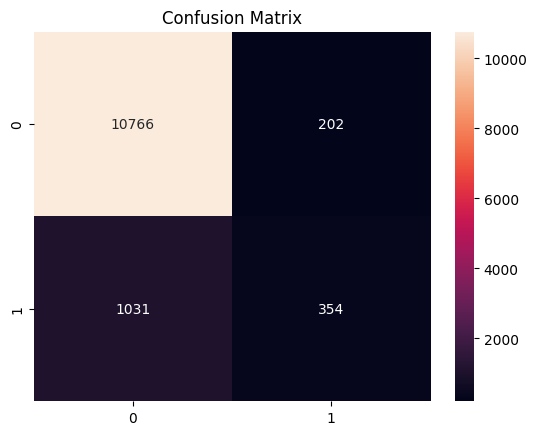

In [10]:
from sklearn.metrics import confusion_matrix
Ypred = model1.predict(Xtest)
cm = confusion_matrix(ytest, Ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Model Evaluation metrics for Basic Logistic Regression
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,Ypred)
print('Overall accuracy_score: ',acc)
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives
# Model Evaluation Metrics
accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Overall accuracy_score:  0.9001861895895734
Precision = 0.6366906474820144
Recall = 0.2555956678700361
F1 Score = 0.3647604327666152


ROC AUC = 0.8256040545913678


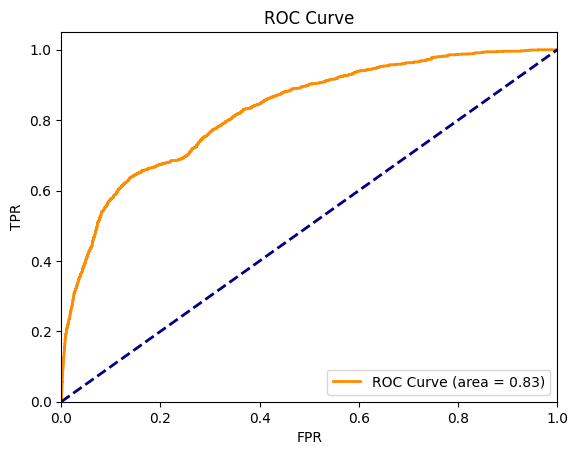

In [12]:
# Draw the Roc Auc curve
from sklearn.metrics import roc_curve,roc_auc_score
Ypred = model1.predict_proba(Xtest)
fpr,tpr,threshold = roc_curve(ytest,Ypred[:,1])
roc_auc = roc_auc_score(ytest,Ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Resample The data for addresss imbalenced data and better model performance

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X_resampled, y_resampled = sm.fit_resample(X, Y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

print(X.shape)
print(X_resampled.shape)

(41176, 20)
(73074, 20)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)
# 30% Testing Data and rest Training Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

(51151, 20)
(21923, 20)
(51151,)
(21923,)


LogisticRegression()

In [15]:
print('Training Accuracy =', model2.score(X_train, y_train))
print('Test Accuracy =', model2.score(X_test, y_test))

Training Accuracy = 0.8389278801978456
Test Accuracy = 0.8427222551658076


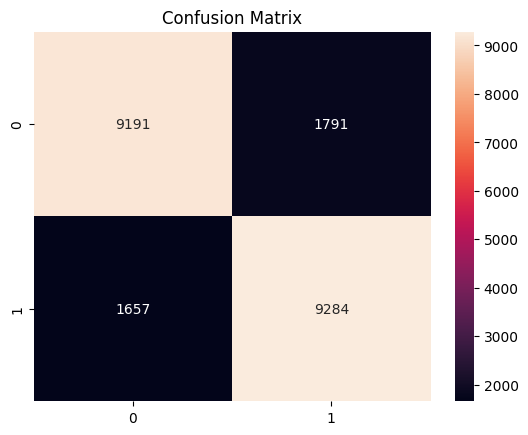

In [16]:
from sklearn.metrics import confusion_matrix
ypred = model2.predict(X_test)
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# make the evaluation metrics
ypred = model2.predict(X_test)
acc = accuracy_score(y_test,ypred)
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)
accuracy = (tp+tn)/(tp+fn+fp+tn)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)
print('Overall accuracy_score: ',acc)

Accuracy = 0.8427222551658076
Precision = 0.8382844243792325
Recall = 0.8485513207202267
F1 Score = 0.8433866279069767
Overall accuracy_score:  0.8427222551658076


ROC AUC = 0.8256040545913678


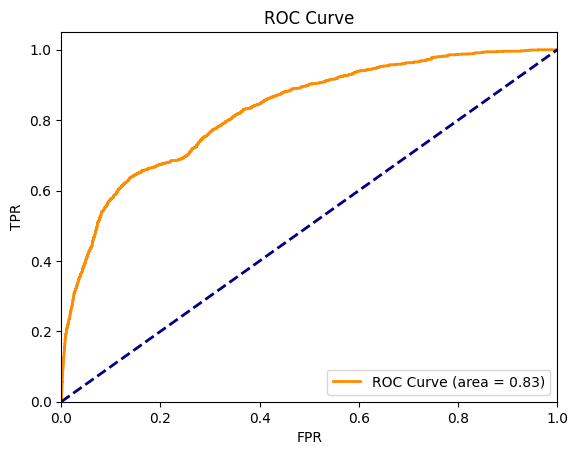

In [18]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model1.predict_proba(Xtest)
fpr,tpr,threshold = roc_curve(ytest,ypred[:,1])
roc_auc = roc_auc_score(ytest,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Lets try other classification models

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier

In [20]:
#find the best parameters with grid search
# KNN - exploring different hyperparameter combinations and find the ones that lead to the best performance
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(5,30),'weights':['uniform','distance']}
GS=RandomizedSearchCV(knn,param,cv=3,scoring='f1_weighted',n_jobs=-1)
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   scoring='f1_weighted')

In [21]:
GS.best_params_

{'weights': 'distance', 'n_neighbors': 5}

In [22]:
dt=DecisionTreeClassifier(random_state=0)
#max_depth = maximum depth of the tree, min_samples_leaf --prevent overfitting only 3to20 range
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
#f1_weighted scoring----balances precision and recall,and addresses imbalences in dataset
GS=RandomizedSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                   scoring='f1_weighted')

In [23]:
#Defining all Classification models
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=6,weights='distance')
DT=DecisionTreeClassifier(criterion='entropy',max_depth=44,min_samples_leaf=14,random_state=0)
RF=RandomForestClassifier(criterion='entropy',n_estimators=13,random_state=0)
Bag=BaggingClassifier(n_estimators=8,random_state=0)
AB=AdaBoostClassifier(n_estimators=90,random_state=0)
GB=GradientBoostingClassifier(n_estimators=98)
stacked = StackingClassifier(estimators=[Bag,RF,AB], final_estimator=KNN)

In [24]:
from sklearn import model_selection
RF_var=[]
for val in np.arange(1,50):
    #Iterates through values of n_estimators from 1 to 49
  RF=RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
    # 3-fold cross-validation with shuffling for random data splits
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
     # Perform cross-validation, Calculate variance of the cross-validation scores
  cv_results = model_selection.cross_val_score(RF, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    # Append the variance of the cross-validation scores
  RF_var.append(np.var(cv_results,ddof=1))


In [25]:
#represent relation between  number of estimators and the corresponding variance of cross-validation scores.
for num_estimators, variance in zip(np.arange(1, 50), RF_var):
    print(f'Number of estimators: {num_estimators}, Variance of CV scores: {variance:.4f}')

Number of estimators: 1, Variance of CV scores: 0.0000
Number of estimators: 2, Variance of CV scores: 0.0000
Number of estimators: 3, Variance of CV scores: 0.0000
Number of estimators: 4, Variance of CV scores: 0.0000
Number of estimators: 5, Variance of CV scores: 0.0000
Number of estimators: 6, Variance of CV scores: 0.0000
Number of estimators: 7, Variance of CV scores: 0.0000
Number of estimators: 8, Variance of CV scores: 0.0000
Number of estimators: 9, Variance of CV scores: 0.0000
Number of estimators: 10, Variance of CV scores: 0.0000
Number of estimators: 11, Variance of CV scores: 0.0000
Number of estimators: 12, Variance of CV scores: 0.0000
Number of estimators: 13, Variance of CV scores: 0.0000
Number of estimators: 14, Variance of CV scores: 0.0000
Number of estimators: 15, Variance of CV scores: 0.0000
Number of estimators: 16, Variance of CV scores: 0.0000
Number of estimators: 17, Variance of CV scores: 0.0000
Number of estimators: 18, Variance of CV scores: 0.0000
N

In [26]:
# variance of cross-validation scores
RF_var[0:10]

[8.263130756429994e-06,
 1.9752835614745926e-05,
 4.920175327361548e-06,
 1.679429124228677e-05,
 2.8985353425762007e-07,
 5.848358746625639e-07,
 2.5339527261791166e-06,
 9.052830963066258e-07,
 4.966761105654031e-07,
 6.865631955685536e-07]

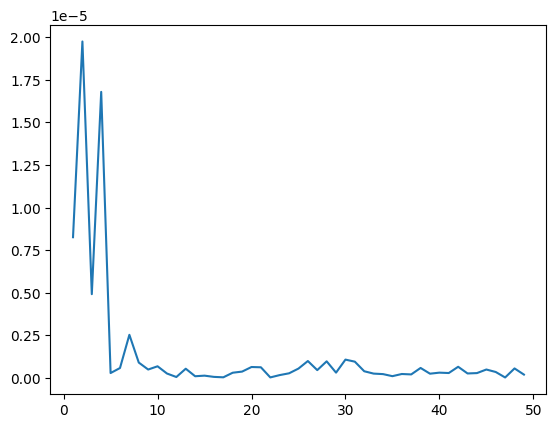

In [28]:
#  variance changes as the number of estimators increases.
plt.plot(np.arange(1, 50),RF_var)
#Observation --- variance decrease as the number of estimators ---- well-performing Random Forest model

In [30]:
# Iterate over different numbers of estimators
from sklearn.metrics import make_scorer,f1_score
for val in np.arange(1, 50):
    # Initialize the RandomForestClassifier
    RF = RandomForestClassifier(criterion='gini', n_estimators=val, random_state=0)

    # Initialize KFold cross-validation
    kfold = model_selection.KFold(n_splits=3, shuffle=True, random_state=0)

    # Define a custom scorer for f1_weighted
    f1_weighted_scorer = make_scorer(f1_score, average='weighted')

    # Perform cross-validation
    cv_results = model_selection.cross_val_score(RF, X_train, y_train, cv=kfold, scoring=f1_weighted_scorer, n_jobs=-1)

    # Compute variance of cross-validation scores and append to RF_var
    variance = np.var(cv_results, ddof=1)
    RF_var.append(variance)

    # Print number of estimators and the corresponding variance
    print(f'Number of estimators: {val}, Variance of CV scores: {variance:.4f}')

# Find the index of the minimum variance
min_variance_index = np.argmin(RF_var)
print(f'Index of minimum variance: {min_variance_index}')

# Print the corresponding number of estimators
print(f'Number of estimators with minimum variance: {min_variance_index + 1}')

Number of estimators: 1, Variance of CV scores: 0.0000
Number of estimators: 2, Variance of CV scores: 0.0000
Number of estimators: 3, Variance of CV scores: 0.0000
Number of estimators: 4, Variance of CV scores: 0.0000
Number of estimators: 5, Variance of CV scores: 0.0000
Number of estimators: 6, Variance of CV scores: 0.0000
Number of estimators: 7, Variance of CV scores: 0.0000
Number of estimators: 8, Variance of CV scores: 0.0000
Number of estimators: 9, Variance of CV scores: 0.0000
Number of estimators: 10, Variance of CV scores: 0.0000
Number of estimators: 11, Variance of CV scores: 0.0000
Number of estimators: 12, Variance of CV scores: 0.0000
Number of estimators: 13, Variance of CV scores: 0.0000
Number of estimators: 14, Variance of CV scores: 0.0000
Number of estimators: 15, Variance of CV scores: 0.0000
Number of estimators: 16, Variance of CV scores: 0.0000
Number of estimators: 17, Variance of CV scores: 0.0000
Number of estimators: 18, Variance of CV scores: 0.0000
N

crossvalidation for bagging

In [31]:

Bag_var=[]
for val in np.arange(1,20):
  Bag=BaggingClassifier(n_estimators=val,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(Bag, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  Bag_var.append(np.var(cv_results,ddof=1))
  print(val,np.var(cv_results,ddof=1))

1 1.0377084446368385e-06
2 3.5875155705962323e-06
3 8.724199181154224e-07
4 1.330806420666968e-06
5 7.112225906236399e-07
6 1.52715266367943e-07
7 2.6645876006532104e-06
8 6.404721684184012e-07
9 1.7386013067448145e-06
10 8.382024774030382e-07
11 2.9563898921816534e-06
12 3.8008304653729198e-06
13 5.235717148620936e-06
14 2.992916452021933e-06
15 5.470177186479603e-06
16 7.148082479341368e-06
17 5.859631739405872e-06
18 5.491928431666786e-06
19 6.0143902382054994e-06


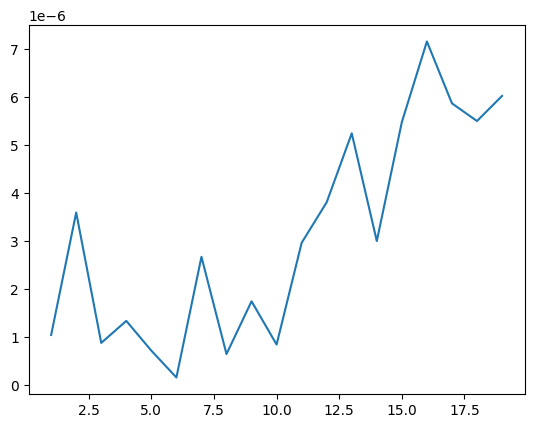

In [32]:
x_axis=np.arange(1,20)
plt.plot(x_axis,Bag_var)

In [33]:
#evaluating impact of the number of estimators on the bias of an AdaBoost classifier.
Ada_bias=[]
for val in np.arange(1,100):
    #Iterates through values of n_estimators from 1 to 99
  Ada=AdaBoostClassifier(n_estimators=val,random_state=0)
    #Set-up 3-fold cross-validation with shuffling for random data splits.
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    #Perform cross-validation using the AdaBoost classifier on the training data
  cv_results = model_selection.cross_val_score(Ada, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  Ada_bias.append(1-np.mean(cv_results))
  print(val,1-np.mean(cv_results))

1 0.26366535224268184
2 0.24577872673717993
3 0.17955259645750654
4 0.14607847652568162
5 0.13561659360849232
6 0.13932904207859542
7 0.13826382065079879
8 0.13315833527312304
9 0.12966121398030994
10 0.13257896644722988
11 0.12218034873753725
12 0.12339555419955694
13 0.12399966136894902
14 0.12168728817058605
15 0.11955184447958878
16 0.11836665149336556
17 0.11576684806138438
18 0.11397996985775605
19 0.11323655508072739
20 0.11360617534611006
21 0.11315989157647188
22 0.10948309519231214
23 0.10772593296607014
24 0.10766945940934314
25 0.10616552452698214
26 0.10686485338509799
27 0.10542020171545052
28 0.10512649066657165
29 0.10440611823162993
30 0.10395460869863127
31 0.10487316914972966
32 0.10295957584104676
33 0.1036204466332532
34 0.10279999682808716
35 0.10229159196092974
36 0.10278004624185533
37 0.10270222095507853
38 0.10219321917628532
39 0.1021940060352492
40 0.10193875856115397
41 0.10170507789708694
42 0.10164675357070585
43 0.10139092106296932
44 0.10143007503855694

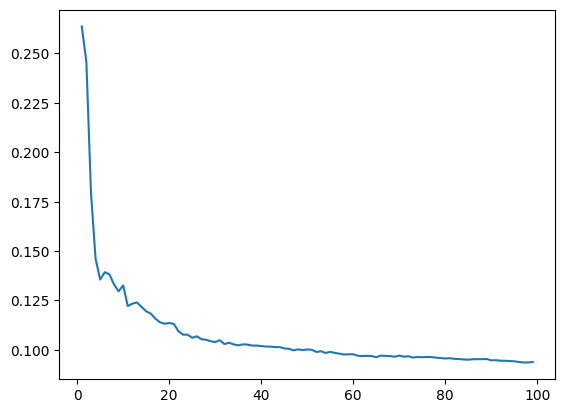

In [34]:
x_axis=np.arange(1,100)
plt.plot(x_axis,Ada_bias)
# bias continues to decrease as the number of estimators grows --- modelcan consistent predictions

In [35]:
np.argmin(Ada_bias)
# 97 is the Optimal number of estimators

97

In [36]:
GB_bias=[]
for val in np.arange(1,100):
  gb=GradientBoostingClassifier(n_estimators=val)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  cv_results = model_selection.cross_val_score(gb, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
  GB_bias.append(1-np.mean(cv_results))
  print(val,1-np.mean(cv_results))

1 0.13926326870017636
2 0.12917308536385852
3 0.12811630854667866
4 0.12644051278373392
5 0.12338043628594297
6 0.11983044635961981
7 0.11890407556117244
8 0.11806149722768844
9 0.11673629066812063
10 0.11667706135041078
11 0.11608935034702828
12 0.11597411211776976
13 0.1138419814029219
14 0.11386858229130759
15 0.11254749046479118
16 0.11184796660774887
17 0.11115751933961626
18 0.11114944804289995
19 0.10983428367870729
20 0.1098796224194225
21 0.10968543946025866
22 0.1097028723700374
23 0.1088582489025639
24 0.10851835005223176
25 0.10787177311784324
26 0.10736135544073688
27 0.10589655079072946
28 0.10587512875515548
29 0.10565364537312671
30 0.10488582217047149
31 0.10440968273583329
32 0.10405125053109288
33 0.1032286404622309
34 0.1026353704515629
35 0.10286848346567157
36 0.10184872302485293
37 0.10174907852998538
38 0.1014974477706273
39 0.10088729700791299
40 0.1008237765150467
41 0.10035519656527037
42 0.0999599780849234
43 0.0993662410683015
44 0.0992132652790435
45 0.098

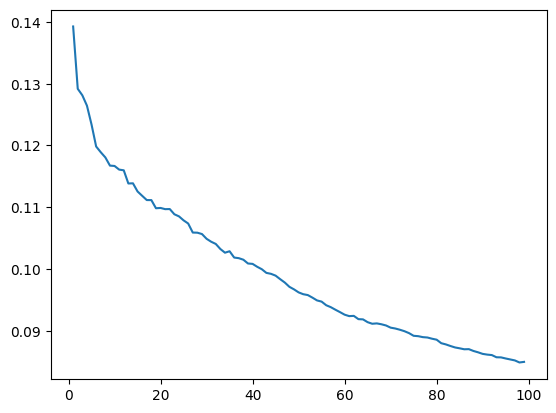

In [37]:
x_axis=np.arange(1,100)
plt.plot(x_axis,GB_bias)

In [38]:
np.argmin(GB_bias)

97

In [39]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('AdaBoost',AB))
models.append(('GBoost',GB))

In [41]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results), np.std(cv_results)))

Logistic: 0.868187 (0.002142)
NaiveBayes: 0.758846 (0.001696)
KNN: 0.898472 (0.000987)
DecisionTree: 0.906486 (0.000785)
RandomForest: 0.939457 (0.000364)
AdaBoost: 0.905297 (0.000857)
GBoost: 0.915121 (0.001633)


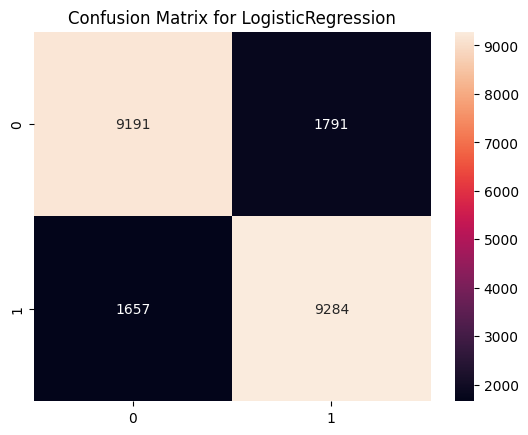

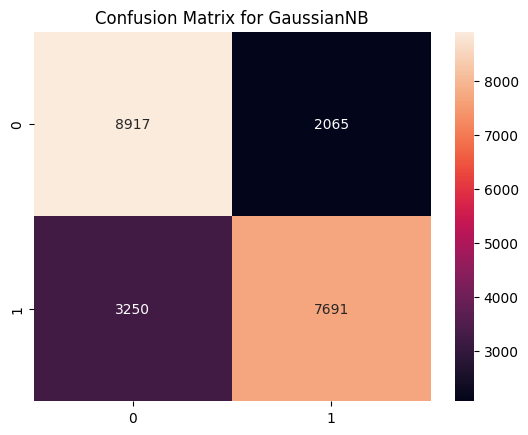

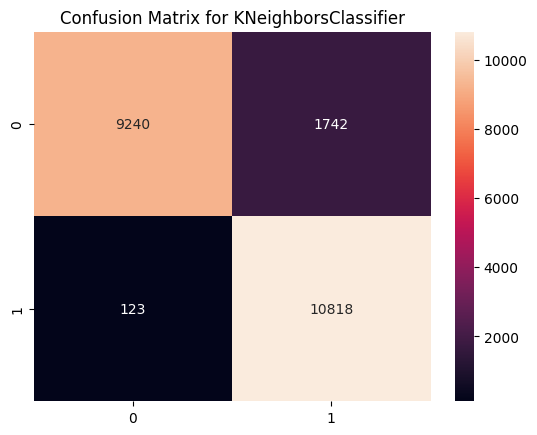

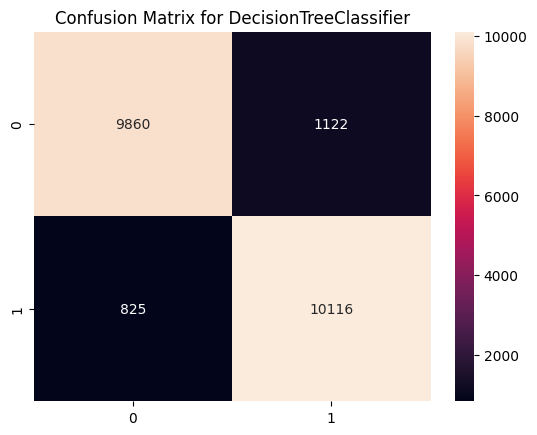

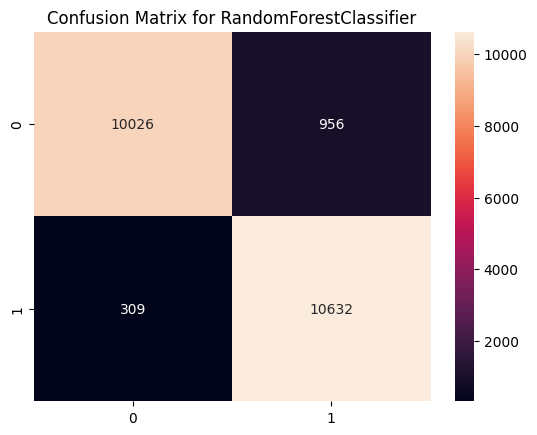

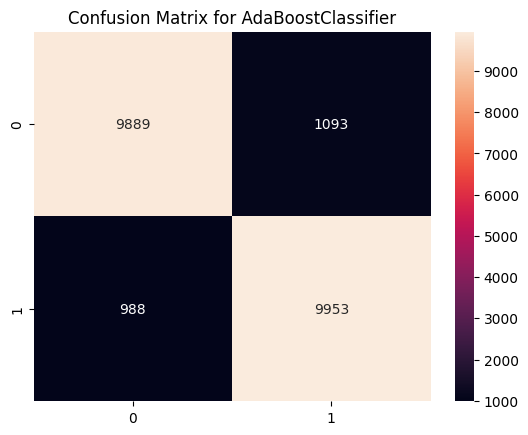

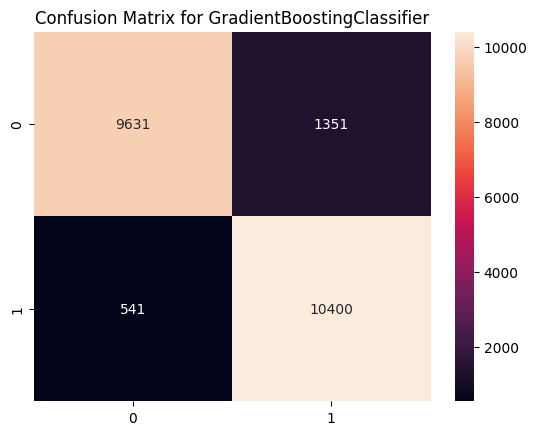

In [43]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test):

  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.title(f'Confusion Matrix for {type(model).__name__}')
  plt.show()

# Plot confusion matrices for all models
for name, model in models:
  model.fit(X_train, y_train)
  plot_confusion_matrix(model, X_test, y_test)


while accuracy can be a useful metric in most cases, the weighted F1-score is generally a more robust and informative choice for evaluating classification models on imbalanced datasets, even after applying SMOTE.

The weighted F1-score gives more weight to the minority class(If customer has subribed to Term Deposit), which is often the more critical class in imbalanced datasets.

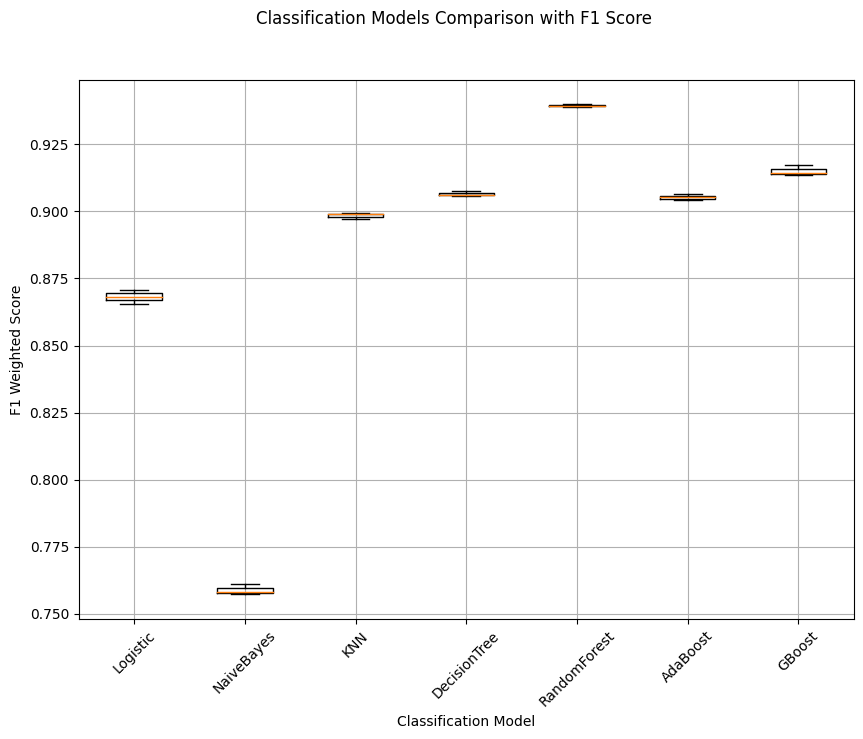

In [44]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Classification Models Comparison with F1 Score')
ax = fig.add_subplot(111)
ax.boxplot(results, labels=names)
ax.set_xlabel('Classification Model')
ax.set_ylabel('F1 Weighted Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Logistic: Accuracy = 0.8443
NaiveBayes: Accuracy = 0.7576
KNN: Accuracy = 0.9149
DecisionTree: Accuracy = 0.9112
RandomForest: Accuracy = 0.9423
AdaBoost: Accuracy = 0.9051
GBoost: Accuracy = 0.9137


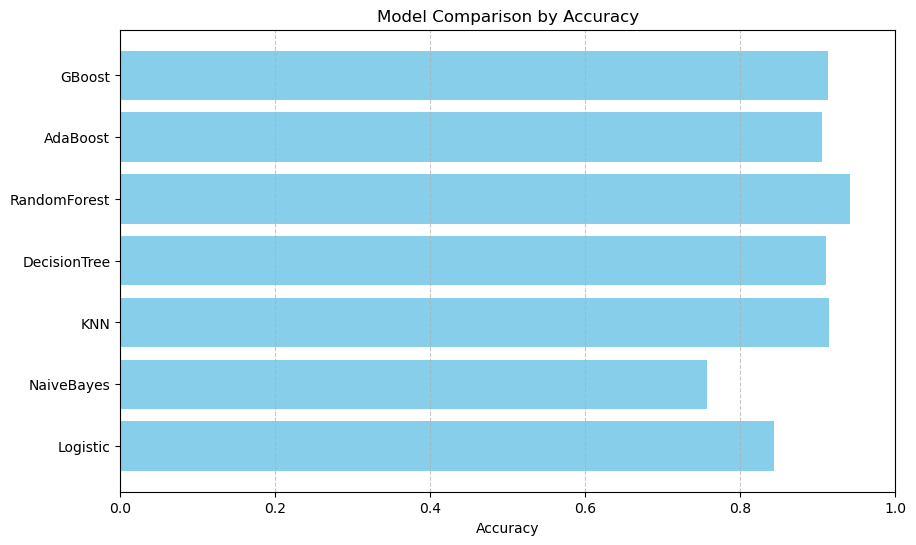

In [ ]:
accuracies = []
model_names = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    model_names.append(name)
    print(f"{name}: Accuracy = {accuracy:.4f}")

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison by Accuracy')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

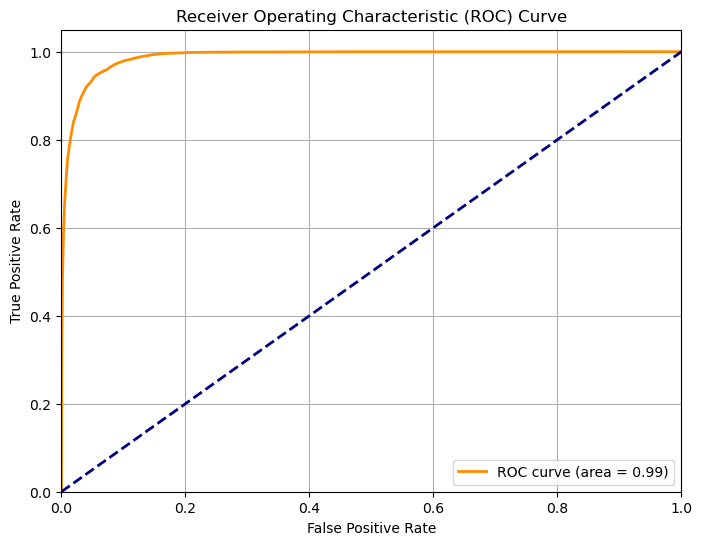

In [ ]:
# Predict probabilities for the positive class
y_probs = RF.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve FOR RANDOM FOREST Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Random Forest model has the best accuracy and f1 score and good roc auc plot

In [46]:
RF.fit(X, Y)

RandomForestClassifier(n_estimators=49, random_state=0)

In [ ]:
# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(RF, open(filename, 'wb'))

## Neural Network Model

In [47]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

In [48]:
Xtrain = np.asarray(X)
Xtest = np.asarray(X)
Ytrain = np.asarray(Y)
Ytest = np.asarray(Y)
Xtrain = Xtrain.astype('float32')
Ytrain = Ytrain.astype('float32')
print("X train shape" + str(Xtrain.shape))
print("X test shape" + str(Xtest.shape))
print("Y train shape" + str(Ytrain.shape))
print("Y test shape" + str(Ytest.shape))

X train shape(41176, 20)
X test shape(41176, 20)
Y train shape(41176,)
Y test shape(41176,)


In [49]:
def FModel(input_shape):

    X_input = Input(input_shape)
    #
    X = Dense(100, kernel_initializer='normal', activation='relu')(X_input)
    X = Dense(70, activation = 'relu', name = 'fc2')(X)
    X = Dense(60, activation = 'relu', name = 'fc3')(X)
    X = Dense(50, activation = 'relu', name = 'fc8')(X)
    X = Dense(40, activation = 'relu', name = 'fc9')(X)
    X = Dense(30, activation = 'relu', name = 'fc10')(X)
    X = Dense(15, activation = 'relu', name = 'fc4')(X)
    X = Dense(10, activation = 'relu', name = 'fc5')(X)
    X = Dense(7, activation = 'relu', name = 'fc6')(X)
    X = Flatten()(X)
    X = Dense(1, activation = 'sigmoid', name = 'fc7')(X)
    model = Model(inputs = X_input, outputs = X, name = 'FModel')
    return model

In [50]:
DLModel = FModel((20,1))
DLModel.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

DLModel.fit(x = Xtrain,y = Ytrain, epochs = 20, batch_size = 64)

preds = DLModel.evaluate(Xtest,Ytest)

print ("Loss = " + str(preds[0]))
print ("Accuracy = " + str(round(preds[1]*100,3)) + " %")

Epoch 1/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8700 - loss: 0.3780
Epoch 2/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8937 - loss: 0.3005
Epoch 3/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8982 - loss: 0.2916
Epoch 4/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9000 - loss: 0.2591
Epoch 5/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9057 - loss: 0.2139
Epoch 6/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9078 - loss: 0.2076
Epoch 7/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9047 - loss: 0.2161
Epoch 8/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9071 - loss: 0.2066
Epoch 9/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9052 - loss: 0.2143
Epoch 10/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9078 - loss: 0.2064
Epoch 11/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9048 - loss: 0.2106
Epoch 12/20
644/644 ━━━━━━━━━━

1287/1287 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


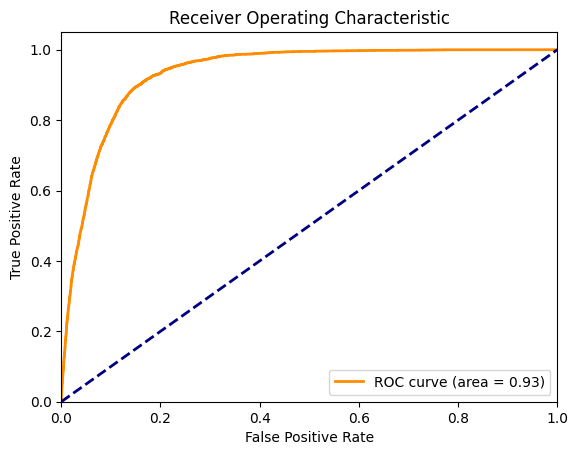

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_prob = DLModel.predict(Xtest)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Ytest, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


1287/1287 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


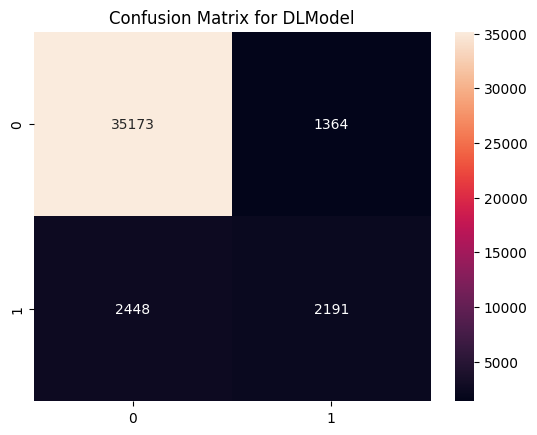

In [52]:
# Get predicted classes
y_pred = (DLModel.predict(Xtest) > 0.5).astype("int32")

# Calculate the confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for DLModel')
plt.show()
